<a href="https://colab.research.google.com/github/JGCMachado/Datasets/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP de Análise de Dados e Boas Práticas
Profs. Tatiana Escovedo e Hugo Villamizar

##Aluno: José Guilherme Campos Machado

Este trabalho é referente ao MVP da primeira sprint (Análise Exploratória e Pré-Processamento de Dados) do curso de Pós-Graduação em Ciência de Dados e Analytics da PUC-RJ

##1.0 Definição do problema

Sabemos que os problemas cardíacos estão entre as principais causas de mortes no mundo e que entre os principais fatores de risco que podem levar a eles podemos citar a idade, o sexo, histórico familiar, altas taxas de colesterol, pressão arterial elevada, tabagismo, sedentarismo e obesidade.
Nem todos esses fatores estão presentes nesse estudo mas alguns deles nos guiarão por esse trabalho de analise exploratória e pré processamento na busca por padrões e tendências que possam ser úteis na prevenção e tratamento de doenças cardíacas, nos fornecendo insights valiosos para futuras pesquisas e intervenções médicas.


In [1]:
# Importação da imagem 
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/JGCMachado/Imagens/main/heartdisease.jpg')
#Image(url='https://raw.githubusercontent.com/Z3Gu1/Imagens/5e16249947e7fc9d33ecbe1fce77c9a1c4506193/heartdisease.jpg')



O conjunto de dados Heart Disease UCI contém informações sobre pacientes que foram avaliados para a presença de doença cardíaca. É um arquivo no formato csv e não contém os nomes das colunas.


O dataset adotado é composto por informações referentes a pacientes do hospital de Cleveland. O conjunto consiste nos dados de 303 indivíduos. Há 14 colunas (que foram extraídas de um conjunto maior de 75). Não há valores ausentes. A tarefa de classificação é tentar antecipar se uma pessoa tem tendência a desenvolver complicações cardíacas.


Este é um problema de aprendizado supervisionado e o campo target contém os valores 0 para ausência de doenças cardíacas, 1 para presença de doenças cardíacas e 2 3 e 4 para presença de doenças cardíacas com diferentes graus de gravidade.






Para esse trabalho foram levantadas algumas hipóteses:

1. A idade e o sexo do paciente podem estar correlacionados com a presença de doença cardíaca?
2. Certos fatores de risco, como hipertensão e colesterol alto, podem ser indicadores importantes para a presença de doença cardíaca?
3. Os resultados de testes cardíacos, como o ECG, podem fornecer informações úteis para prever a presença de doença cardíaca?




O dataset chama "Cleveland Heart Disease", pertence ao acervo do site UCI e pode ser consultado em https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

Para facilitar o entendimento no decorrer das análises os nomes dos atributos originais do dataset foram traduzidos ou adaptados.


**Informações sobre os atributos:**
1. **idade** - em anos
2. **sexo** - **1** masculino e **0** feminino
3. **angina** - Dores no peito (chest pain) (**1** angina tipica, **2** angina atipica, **3** dor torácica não anginal, **4** assintomático)
4. **pa** - pressão arterial em repouso (em mm Hg na adimissão ao hospital)
5. **colesterol** - colesterol mg/dl
6. **glicose** - glicose em jejum (fasting blood sugar) > 120 mg/dl (**1** verdadeiro, **0** falso)
7. **ecg** - eletrocardiograma repouso (**0** normal, **1** anormalidades da onda ST-T , **2** hipertrofia ventricular esquerda provável ou definitiva)
8. **bpm** -  batimentos cardiacos maximo por minuto alcançado
9. **exang** - exercicio induz angina? (**1** sim, **0** não)
10. **depressão do segmento ST** - "oldpeak", induzida pelo exercício em relação ao repouso. Esse atributo mede a depressão do segmento ST do eletrocardiograma (ECG) induzida pelo exercício físico em relação ao repouso. A depressão do segmento ST é uma medida da isquemia miocárdica, que é uma redução do suprimento de sangue ao músculo cardíaco, geralmente devido a uma obstrução nas artérias coronárias. É expresso em milímetros (mm).  **Valores elevados de "Oldpeak" podem indicar uma isquemia miocárdica mais acentuada** e um risco maior de complicações cardíacas.
11. **inclinação do segmento ST** - "Slope" Ou elevação do ponto J no eletrocardiograma (ECG)
      1. indica uma inclinação ascendente do segmento ST durante o pico do exercício, o que é considerado normal e indica menor risco de eventos cardiovasculares futuros
      2. indica um segmento ST plano durante o pico do exercício, o que pode indicar uma doença arterial coronariana em estágio inicial e um risco moderado de eventos cardiovasculares futuros
      3. indica uma inclinação descendente do segmento ST durante o pico do exercício, o que indica uma doença arterial coronariana mais grave e um risco elevado de eventos cardiovasculares futuros
12. **angiografia** - número de vasos sanguíneos importantes no coração que foram visualizados durante uma angiografia coronária(**0-3**) coloridas por fluoroscopia.
13. **cintilografia** - teste de estresse nuclear (**3**  normal, **6** defeito fixo, **7** defeito reversível)
14. **grau doença arterial** - status da doença arterial coronariana diagnosticada pelo exame angiográfico (**0** Ausência de doença cardíaca, **1** Presença de doença cardíaca, **2 3** e **4** Presença de doença cardíaca com diferentes graus de gravidade)



###1.1 Créditos autorais

Originalmente esse dataset é composto por quatro arquivos. Os responsáveis por cada arquivo coletado são:

1. Robert Detrano, M.D., Ph.D. - Centro Médico V.A. em Long Beach e Fundação da Clínica Cleveland
2. Andras Janosi, M.D. - Instituto Húngaro de Cardiologia em Budapeste 
3. Matthias Pfisterer, M.D. - Hospital Universitário, Basel, Suíça
4. William Steinbrunn, M.D. - Hospital Universitário de Zurique, Suíça


In [2]:
# Importações
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

In [3]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Definindo estilo e as paletas de cores que serão usadas

# Definindo a paleta usada para os graficos sobre o grau da doenca cardiaca
palette1_colors = sns.color_palette("Paired")
palette2_colors = sns.color_palette("rocket")
# Definindo as cores usadas e de qual paleta
color_0 = palette1_colors[3]
color_1 = palette2_colors[4]
color_2 = palette2_colors[3]
color_3 = palette2_colors[2]
color_4 = palette2_colors[1]
paleta_grau_doenca_arterial = [color_0, color_1, color_2, color_3, color_4]

# Definindo a paleta usada para os graficos de pizza
paleta_pizza=sns.color_palette("tab10")

##2.0 Carga de Dados

A importação do dataset será através do pacote Pandas (Python Data Analysis Library), um arquivo .csv sem cabeçalho disponibilizado no github.

Com o dataset carregado, iremos explorá-lo um pouco.


In [5]:
# Como o cabeçalho não está no arquivo, aqui preparamos os nomes das colunas para importar junto
colunas = ['idade', 'sexo', 'angina', 'pa', 'colesterol', 'glicose', 'ecg', 'bpm', 'exang', 'depressão do segmento ST',  \
           'inclinação do segmento ST', 'angiografia', 'cintilografia', 'grau doença arterial']

# Carrega a variavel com o endereço do arquivo no github que contem o dataset
filename = "https://raw.githubusercontent.com/JGCMachado/Datasets/main/processed.cleveland.data.csv" 
#filename = "https://raw.githubusercontent.com/Z3Gu1/Datasets/main/processed.cleveland.data.csv" 

# carga do dataset adicionando os nomes das colunas
heart_disease = pd.read_csv(filename, names=colunas)

In [6]:
# verifica o tipo do dataset heart_disease
print(type(heart_disease))

<class 'pandas.core.frame.DataFrame'>


In [7]:
# exibe as primeiras linhas para verificar se a importação ocorreu de acordo com o esperado
heart_disease.head()

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,angiografia,cintilografia,grau doença arterial
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3.0 Analise de Dados

### 3.1 Estatísticas Descritivas

Iniciaremos explorando um pouco o dataset heart, suas dimensões, informações e alguns exemplos de linhas.
Como já foi dito no inicio e agora podemos comprovar, o dataset é composto por 303 linhas referentes aos pacientes e 14 colunas referentes as suas condições cardiológicas.
Na sequencia vamos ver os tipos de dados dos atributos contidos no arquivo original e uma pequena amostra das 10 primeiras e 10 ultimas linhas do dataset para analisar um pouco de seu conteudo e verificar se a importação dos dados foi ok.

In [8]:
# Mostra as dimensões do dataset
print(heart_disease.shape)

(303, 14)


In [9]:
# Mostra as informações do dataset
print(heart_disease.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   idade                      303 non-null    float64
 1   sexo                       303 non-null    float64
 2   angina                     303 non-null    float64
 3   pa                         303 non-null    float64
 4   colesterol                 303 non-null    float64
 5   glicose                    303 non-null    float64
 6   ecg                        303 non-null    float64
 7   bpm                        303 non-null    float64
 8   exang                      303 non-null    float64
 9   depressão do segmento ST   303 non-null    float64
 10  inclinação do segmento ST  303 non-null    float64
 11  angiografia                303 non-null    object 
 12  cintilografia              303 non-null    object 
 13  grau doença arterial       303 non-null    int64  

In [10]:
# Mostra as 10 primeiras linhas do dataset
heart_disease.head(10)

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,angiografia,cintilografia,grau doença arterial
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [11]:
# Mostra as 10 últimas linhas do dataset
heart_disease.tail(10)

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,angiografia,cintilografia,grau doença arterial
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Verificar os tipos dos dados é um passo importante para garantir que você possa trabalhar com o conjunto de forma precisa e eficaz. Os tipos de dados podem afetar diretamente a forma como você manipula e analisa o dataset.

Com base na a verificação dos datatypes podemos verificar que varios atributos que são do tipo int estão definidos como float, assim como os dois atributos que estão como object.



Nesse momento vejo que é importante converter os atributos que estão como object para int que é o tipo correto deles, para que eles apareçam nas estatísticas descritivas. Ao tentar executar essa conversão descobri que embora eles não contenham nulos ou "NaN" eles apresentam valores inválidos que inviabilizam uma conversão direta sem tratamento.

Vou então apenas converte-los para numéricos e posteriormente na fase de tratamento de missings e limpeza farei um trabalho mais a fundo nesse ponto com esses e com os demais atributos.

In [12]:
# Convertendo os atributos para numericos
heart_disease[["cintilografia", "angiografia"]] = heart_disease[["cintilografia", "angiografia"]].apply(pd.to_numeric, errors='coerce')

In [13]:
# Verificando novamente os tipos de dados das colunas
heart_disease.dtypes

idade                        float64
sexo                         float64
angina                       float64
pa                           float64
colesterol                   float64
glicose                      float64
ecg                          float64
bpm                          float64
exang                        float64
depressão do segmento ST     float64
inclinação do segmento ST    float64
angiografia                  float64
cintilografia                float64
grau doença arterial           int64
dtype: object

In [14]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
heart_disease.describe()

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,angiografia,cintilografia,grau doença arterial
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Vamos agora verificar o balanceamento das cargas do dataset. Em um primeiro momento pode parecer que as classes estão desbalanceadas visto que a classe **0** referente a "Ausência de Doença Cardíaca" é muito maior que as outras porém todas as outras classes juntas representam "Presença de doença cardíaca" 

O que ocorre não é exatamente um desbalanceamento mas esta situação também sera tratada posteriormente.

In [15]:
# distribuição das classes
print(heart_disease.groupby('grau doença arterial').size())

grau doença arterial
0    164
1     55
2     36
3     35
4     13
dtype: int64


### 3.2 Visualizações Unimodais

Ao analisar gráficos unimodais, é possível identificar a localização do pico, a simetria da distribuição e a largura da curva, entre outros aspectos, o que pode ser útil para tomada de decisões.

Vemos nos histogramas abaixo que os atributos idade, pressão arterial (pa), colesterol e frequencia cardiaca (bpm) apresentam uma distribuição proxima a normalidade com o pico muito próximo da media. Já no gráfico de depressão do segmento ST observamos um comportamento exponencial decrescendo a direita mostrando que a  obstrução nas arterias coronárias pode ser um processo gradativo.

Os demais gráficos são referentes a atributos categóricos e mostram suas distribuições sem necessáriamente ter relação entre seus valores. Precisamos ter atenção nos gráficos com o comportamento igual ao gráfico da angina que pode nos levar a interpretar erroneamente um aumento gradativo do valor. Nele, 1 representa angina tipica, 2 angina atipica, 3 dor torácica não anginal e 4 assintomático, não havendo relação nenhuma entre eles.

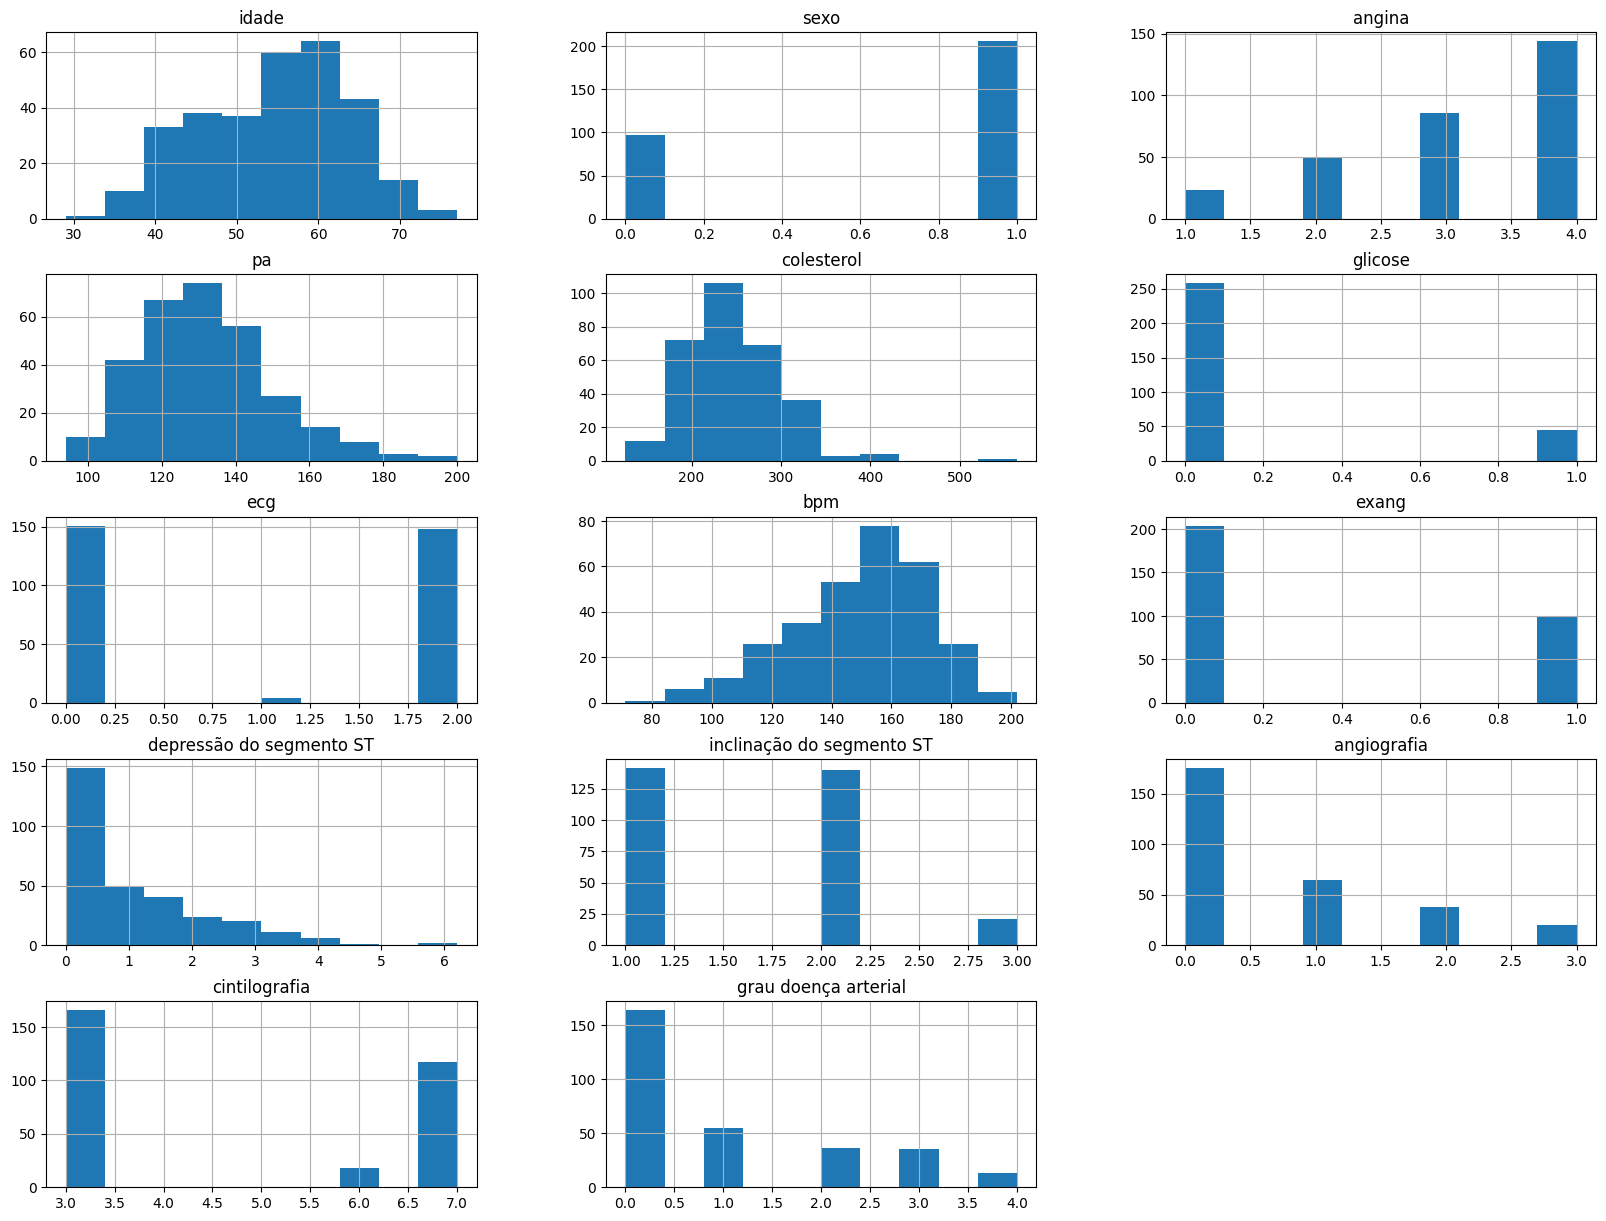

In [16]:
# Histograma
heart_disease.hist(figsize = (20,15), layout = (5,3))
plt.show()

O density plot, é uma visualização gráfica que mostra a distribuição de um conjunto de dados contínuos. É uma forma de representar a densidade de probabilidade de uma variável aleatória.

Para o Density Plot ou Gráfico de Densidade, resolvi utilizar apenas as variáveis contínuas. Vou separar em um subset do heart_disease apenas as variáveis continuas e o nosso target (até o momento) e depois gerar os gráficos


Podemos constatar que os nossos atributos (dentre eles idade, pressão arterial e colesterol que foram mencionados nos fatores de risco) possuem uma concentração com distribuição normal entre os valores e assim como a análise dos histogramas acima possuem maior concentração muito próximo da media.

In [17]:
# Separando as variáveia contínuas em um subset do heart_disease e preparando os títulos para os gráficos
heart_disease_continuas = heart_disease[["idade", "pa", "colesterol", "bpm", "depressão do segmento ST","grau doença arterial"]] 
titulos_heart_disease_continuas = ["Distribuição da idade dos pacientes", "Distribuição da Pressão Arterial", "Distribuição das taxas de Colesterol", \
                                   "Distribuição dos valores dos Batimentos Cardíacos", "Distribuição da Depressão do Segmento ST", "Distribuição do Grau de Doença Arterial"]

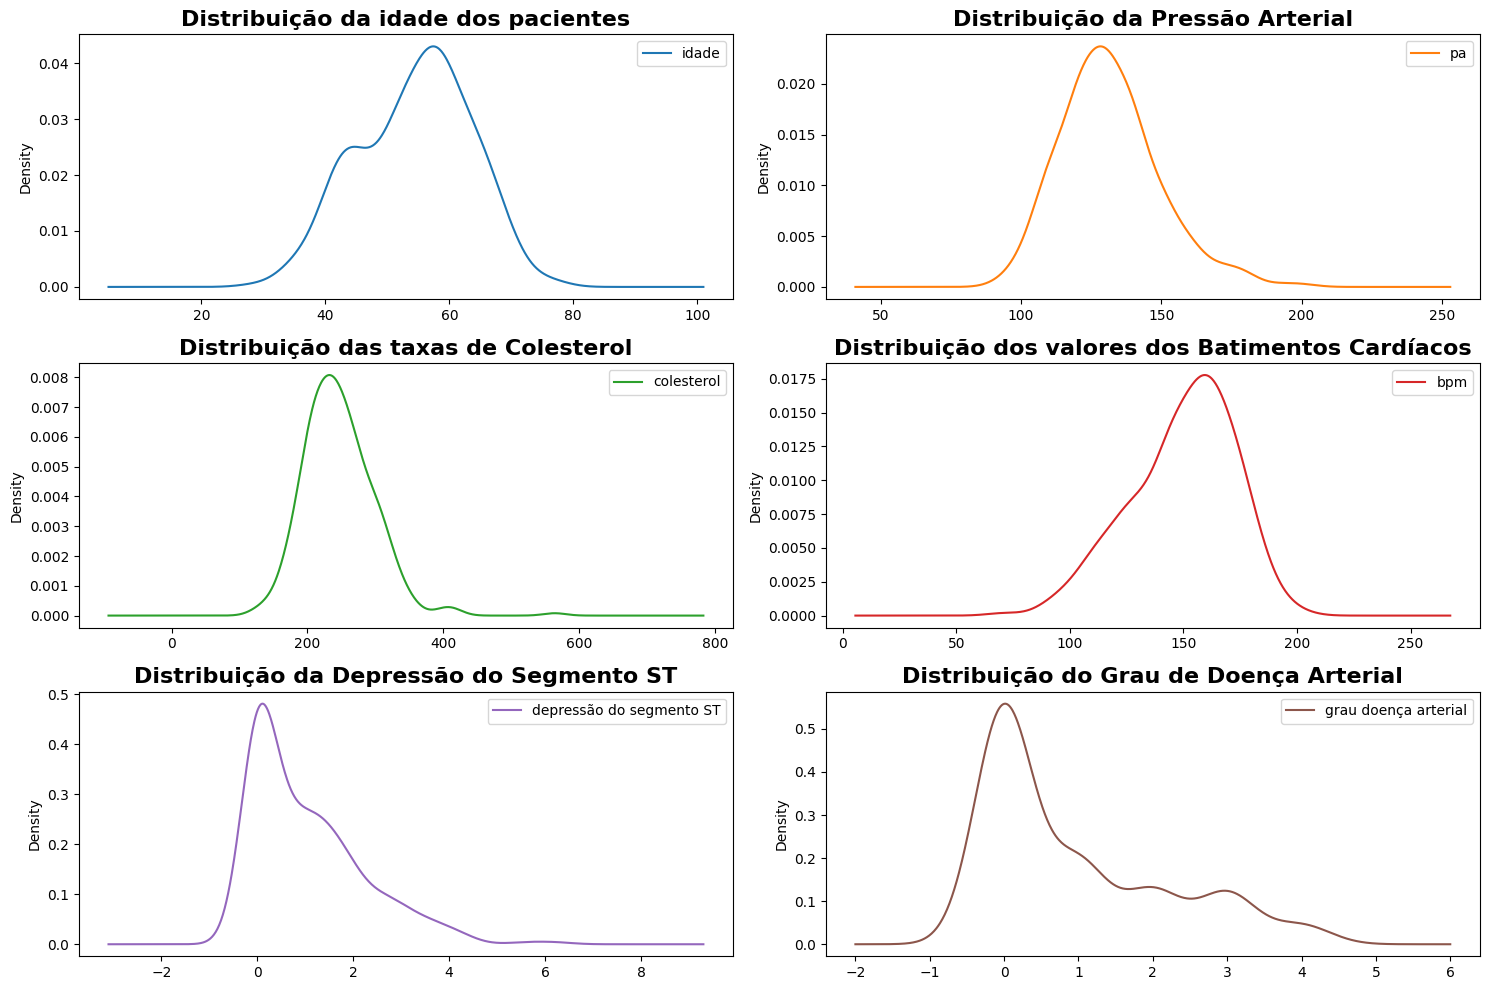

In [18]:
# Density Plot apenas das variáveis continuas
heart_disease_continuas.plot(kind='density', subplots=True, layout=(3,2), sharex=False, figsize=(15,10), grid=False)
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(titulos_heart_disease_continuas[i], fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


### 3.3 Visualizações Categóricas

Nos gráficos anteriores vimos as variáveis contínuas, agora analizaremos a distribuição de algumas variáveis categóricas atravez do gráfico de pizza.

Ao criar os gráficos percebi que os valores eram ordenados de forma decrescente e a lista dos rótulos que eu havia criado poderia não estar na mesma ordem do valores no gráfico gerado. Então para cada atributo utilizado criei um indice já na ordem de exibição, um dataframe com esses valores e inseri os valores corretos dos rótulos para cada valor. Desta forma se mudarem os registros do dataset e com isso mudarem também as quantidades de cada ocorrencia, os rótulos continuarão corretos

Como a definição dos gráficos ficou grande, vou analisa-los após os mesmos.

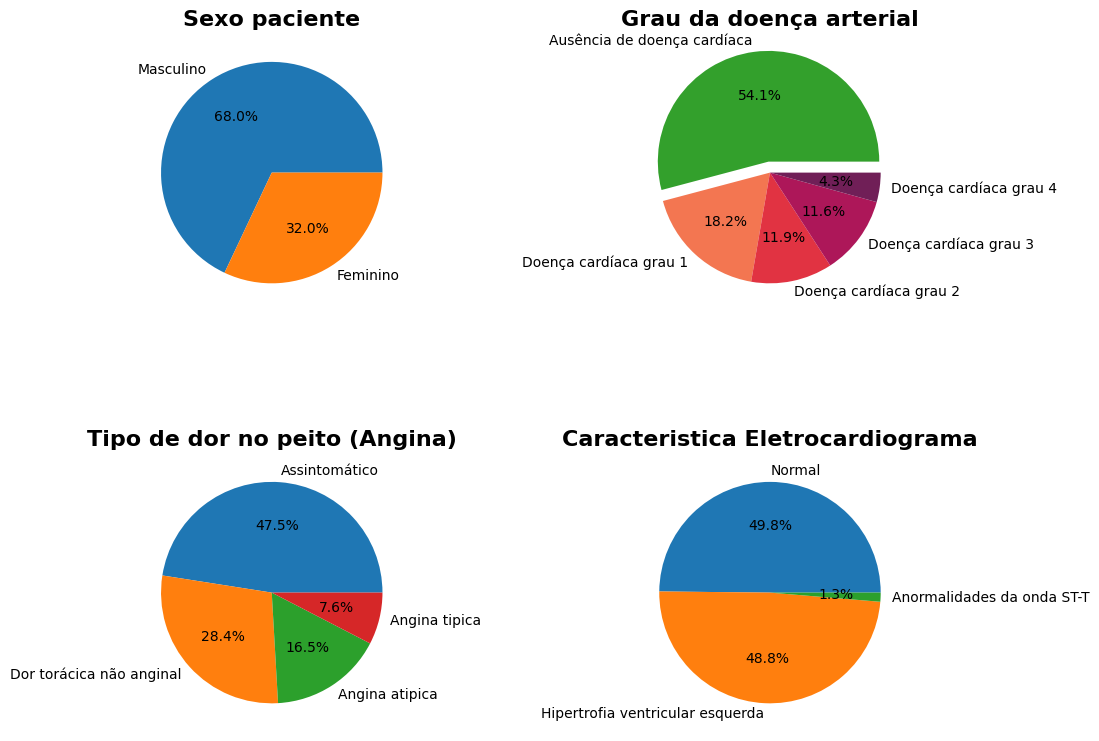

In [19]:
# cria um layout de subplot com 2 linhas e 2 colunas
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# Prepara de forma dinâmica os rótulos para a distribuição de sexo
indice_sexo = heart_disease["sexo"].value_counts().index
df_pizza_sexo = pd.DataFrame({'valor': indice_sexo})

# Transforma os valores de numeros para texto para os rotulos
df_pizza_sexo['rotulo'] = pd.Series(dtype='object')
df_pizza_sexo.loc[df_pizza_sexo['valor'] == 0, 'rotulo'] = 'Feminino'
df_pizza_sexo.loc[df_pizza_sexo['valor'] == 1, 'rotulo'] = 'Masculino'

# cria o gráfico de pizza para a distribuição de sexo
heart_disease['sexo'].value_counts().plot(kind='pie', ax=axs[0,0], autopct='%1.1f%%', legend=False, \
                                          labels=df_pizza_sexo['rotulo'], colors=paleta_pizza, ylabel="")
axs[0,0].set_title("Sexo paciente", fontsize=16, fontweight="bold")

# Prepara de forma dinâmica os rótulos para o grau da doença arterial
indice_doenca_arterial = heart_disease["grau doença arterial"].value_counts().index
df_pizza_doenca_arterial = pd.DataFrame({'valor': indice_doenca_arterial})

# Transforma os valores de numeros para texto para os rotulos
df_pizza_doenca_arterial['rotulo'] = pd.Series(dtype='object')
df_pizza_doenca_arterial.loc[df_pizza_doenca_arterial['valor'] == 0, 'rotulo'] = 'Ausência de doença cardíaca'
df_pizza_doenca_arterial.loc[df_pizza_doenca_arterial['valor'] == 1, 'rotulo'] = 'Doença cardíaca grau 1'
df_pizza_doenca_arterial.loc[df_pizza_doenca_arterial['valor'] == 2, 'rotulo'] = 'Doença cardíaca grau 2'
df_pizza_doenca_arterial.loc[df_pizza_doenca_arterial['valor'] == 3, 'rotulo'] = 'Doença cardíaca grau 3'
df_pizza_doenca_arterial.loc[df_pizza_doenca_arterial['valor'] == 4, 'rotulo'] = 'Doença cardíaca grau 4'

# cria o gráfico de pizza para o grau da doença arterial
explode = (0.1, 0.0, 0.0, 0.0, 0.0)
heart_disease['grau doença arterial'].value_counts().plot(kind='pie', ax=axs[0,1], autopct='%1.1f%%', legend=False, \
                                                          labels=df_pizza_doenca_arterial['rotulo'], colors=paleta_grau_doenca_arterial, \
                                                          explode=explode, ylabel="")
axs[0,1].set_title("Grau da doença arterial", fontsize=16, fontweight="bold")

# Prepara de forma dinâmica os rótulos para o tipo de dor no peito
indice_angina = heart_disease["angina"].value_counts().index
df_pizza_angina = pd.DataFrame({'valor': indice_angina})

# Transforma os valores de numeros para texto para os rotulos
df_pizza_angina['rotulo'] = pd.Series(dtype='object')
df_pizza_angina.loc[df_pizza_angina['valor'] == 1, 'rotulo'] = 'Angina tipica'
df_pizza_angina.loc[df_pizza_angina['valor'] == 2, 'rotulo'] = 'Angina atipica'
df_pizza_angina.loc[df_pizza_angina['valor'] == 3, 'rotulo'] = 'Dor torácica não anginal'
df_pizza_angina.loc[df_pizza_angina['valor'] == 4, 'rotulo'] = 'Assintomático'

# cria o gráfico de pizza para o tipo de dor no peito
heart_disease['angina'].value_counts().plot(kind='pie', ax=axs[1,0], autopct='%1.1f%%', legend=False, \
                                            labels=df_pizza_angina['rotulo'], colors=paleta_pizza, ylabel="")
axs[1,0].set_title("Tipo de dor no peito (Angina)", fontsize=16, fontweight="bold")

# Prepara de forma dinâmica os rótulos para o resultado do Eletrocardiograma
indice_ecg = heart_disease["ecg"].value_counts().index
df_pizza_ecg = pd.DataFrame({'valor': indice_ecg})

# Transforma os valores de numeros para texto para os rotulos
df_pizza_ecg['rotulo'] = pd.Series(dtype='object')
df_pizza_ecg.loc[df_pizza_ecg['valor'] == 0, 'rotulo'] = 'Normal'
df_pizza_ecg.loc[df_pizza_ecg['valor'] == 1, 'rotulo'] = 'Anormalidades da onda ST-T'
df_pizza_ecg.loc[df_pizza_ecg['valor'] == 2, 'rotulo'] = 'Hipertrofia ventricular esquerda'

# cria o gráfico de pizza para a resultado do Eletrocardiograma
heart_disease['ecg'].value_counts().plot(kind='pie', ax=axs[1,1], autopct='%1.1f%%', legend=False, \
                                         labels=df_pizza_ecg['rotulo'], colors=paleta_pizza, ylabel="")
axs[1,1].set_title("Caracteristica Eletrocardiograma", fontsize=16, fontweight="bold")

# ajusta o espaçamento entre subplots
plt.subplots_adjust(wspace=0.8, hspace=0.2)

# exibe o gráfico
plt.show()


Olhando para o primeiro gráfico constatamos que as doenças cardíacas são mais frequentes em pessoas do sexo masculino do que em pessoas do sexo feminino. Isso se dá principalmente por causa de fatores biológicos e comportamentais mais presentes nos individuos do sexo masculino, como maior consumo de tabaco e álcool, maior exposição a estresse ocupacional e menor adesão a hábitos saudáveis. 

Quando olhamos para o gráfico de Grau de Doença Cardíaca observamos que mesmo essa categoria possuindo 5 divisões, A ocorrência de casos de presença de doenças cardíacas e ausência de doenças cardíacas estão quase iguais com uma leve predominância de pacientes sãos.

O atributo Angina do terceiro gráfico se refere à dor torácica do paciente e é uma das características mais importantes para o diagnóstico de doenças cardíacas. Ele é dividido em quatro categorias. A presença de angina típica pode indicar uma doença cardíaca coronária, enquanto a angina atípica pode estar relacionada a outras condições cardíacas. Dor não anginal e assintomática, que juntas somam aproximadamente 75% dos casos, não são específicas de doenças cardíacas.

Por fim, no ultimo gráfico analisamos os resultados do eletrocardiograma em repouso. Ele pode ter três valores, O valor Normal indica que não há alterações significativas no exame, enquanto os valores Anormalidades da onda ST-T e Hipertrofia ventricular esquerda indicam diferentes graus de anormalidades. Notamos um equilibrio entre os resultados normais e alterados do eletrocardiograma.

### 3.4 O BoxPlot

O box plot é um gráfico que apresenta a distribuição de um conjunto de dados numéricos através de cinco estatísticas: valor mínimo, primeiro quartil, mediana, terceiro quartil e valor máximo. Ele é composto por um retângulo (a caixa), que se estende do primeiro ao terceiro quartil, uma linha vertical que representa a mediana e dois segmentos de reta (os bigodes) que se estendem aos valores mínimo e máximo. 

Vamos utilizar o box plot para identificar a dispersão e a presença de outliers no nosso conjunto de dados. Usaremos novamente o nosso dataset reduzido com as variáveis contínuas (heart_disease_continuas)

Alguns possíveis outliers são evidenciados nos gráficos. Podemos entender que tanto valores de 200 para máxima de pressão arterial quanto 71 para batimentos cardíacos são valores que podem ocorrer porém níveis de Colesterol acima de 400 e Depressão do segmento ST no Eletrocardiograma acima de 4,5 podem ser considerados outliers e serão devidamente tratados posteriormente


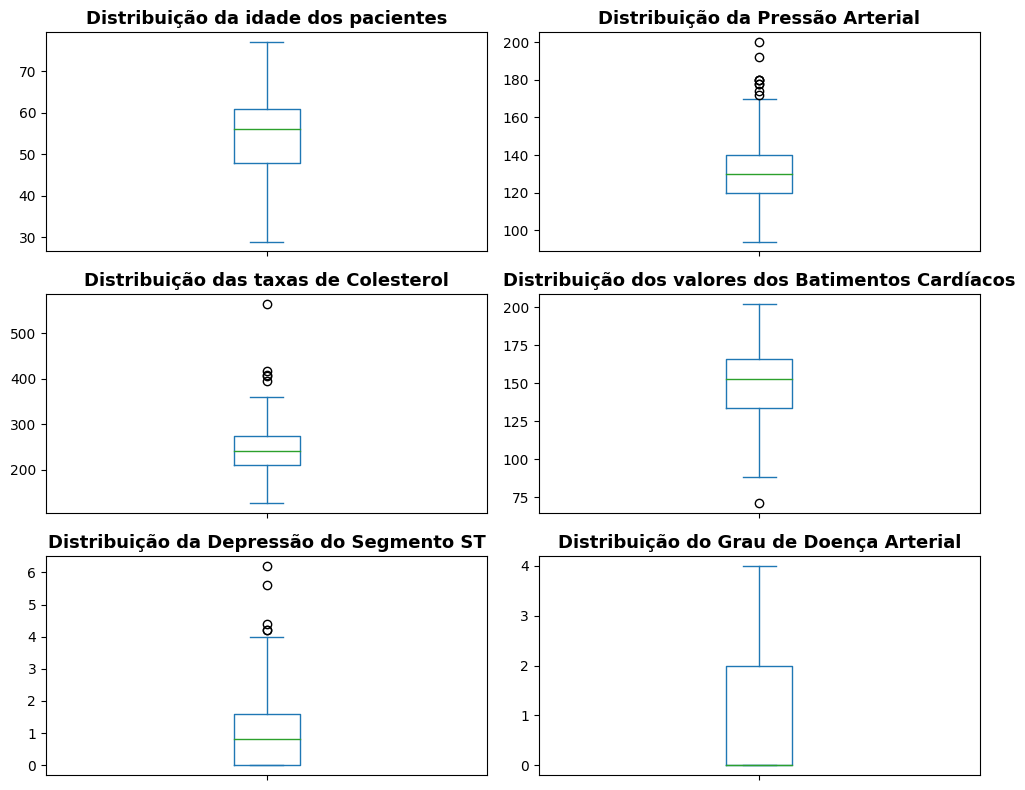

In [20]:
# Gráfico box plot com o dataset reduzido heart_disease_continuas
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
for i, ax in enumerate(axs.flatten()):
    heart_disease_continuas.iloc[:,i].plot(kind = 'box', ax=ax)
    ax.set_title(titulos_heart_disease_continuas[i], fontsize=13, fontweight='bold')
    ax.grid(False)
    ax.tick_params(axis='x', labelbottom=False)
plt.tight_layout()


### 3.5 Visualizações Multimodais

Visualizações multimodais referem-se ao uso de diferentes tipos de gráficos e técnicas de visualização para explorar e entender os dados. A ideia é aproveitar as diferentes visualizações para obter insights que não seriam possíveis com apenas um tipo de gráfico.


Uma matriz de correlação é uma tabela que mostra como duas variáveis ​​se relacionam entre si. O valor da correlação varia de -1 a 1, sendo -1 uma relação negativa (quando uma aumenta a outra diminui), 0 nenhuma relação e 1 uma relação positiva (quando uma aumenta a outra aumenta também). Um heatmap é uma forma visual de representar essa matriz, onde os valores mais altos aparecem em cores mais intensas, enquanto os valores mais baixos aparecem em cores mais suaves. Isso ajuda a identificar rapidamente as relações mais fortes e mais fracas entre as variáveis.


Podemos verificar no grafico abaixo que não existem atributos fortemente relacionados. Vemos no entanto a nossa variável target (grau doença arterial) com um relacionamento positivo moderado com a depressão do segmento ST (eletrocardiograma) o que pode começar a responder nossos questionamentos iniciais sobre testes cardíacos, como o ECG, poderem fornecer informações úteis para prever a presença de doença cardíaca.


Vemos também que tanto o target quanto a idade possuem uma corelação negativa moderada com os batimentos cardíacos (bpm) e a pressão arterial possue uma leve tendencia a uma correlação positiva com idade. Esses tres pontos estão dentro do esperado visto que com o aumento da idade o normal é ter um aumento da pressão arterial e de doenças, e também uma diminuição dos batimentos cardíacos (recem nascidos 130bpm / idosos 60bpm).

Um ponto que chama atenção é o colesterol que em taxas elevadas normalmente é associado a problemas cardíacos mas está apresentando uma correlação positiva porém bem fraca com o target.


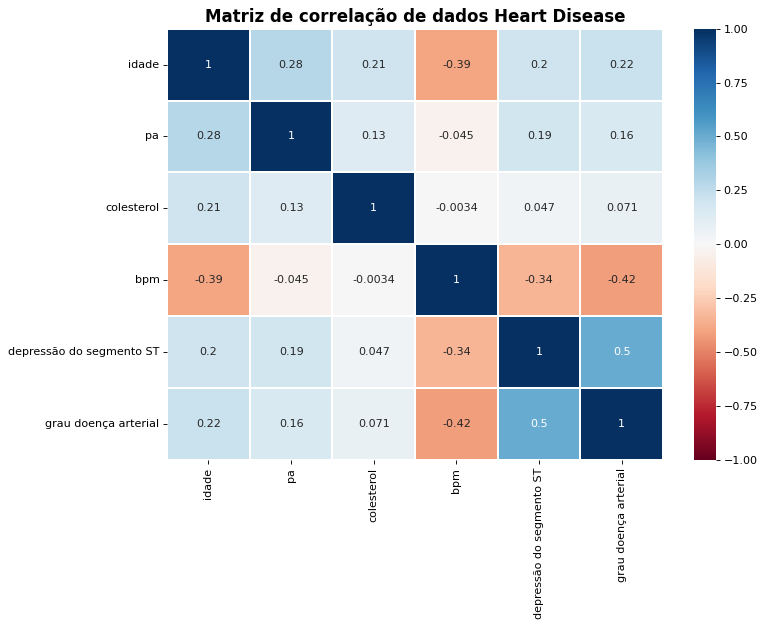

In [21]:
# Matriz de Correlação com Matplotlib Seaborn para o subset de variáveis contínuas
fig, ax = plt.subplots(figsize=(10, 7), dpi=80)
ax.set_title("Matriz de correlação de dados Heart Disease", fontsize=15, fontweight='bold')
sns.heatmap(heart_disease_continuas.corr(), annot=True, cmap='RdBu', linewidths=0.3, ax=ax, vmin=-1, vmax=1);


Os gráficos de disperssão (scatter plot) são comumente utilizado para visualizar a relação entre duas variáveis contínuas. Ele exibe pontos no plano cartesiano, onde cada ponto representa um par de valores das duas variáveis em análise. No entanto, o scatter plot também pode ser utilizado para visualizar a relação entre uma variável contínua e uma variável categórica. Nesse caso, os pontos são agrupados de acordo com as diferentes categorias da variável categórica e podem ser coloridos ou marcados de forma distinta para representar cada categoria.

Eu iria mostrar em um primeiro scatter plot a variação 1 do seaborne e na sequencia a variação 2 com nosso dataset reduzido apenas com as variáveis contínuas mas perderiamos a possibilidade de analisar os graficos das variaveis continuas X variáveis categóricas colorido e evidenciando o grau de comprometimento cardíaco que é o nosso target. Dessa forma resolvi utilizar apenas a variação 2 para as 2 situações.

In [22]:
# Scatter Plot com Seaborn - Variação 2
#sns.pairplot(heart_disease, hue="grau doença arterial", palette=paleta_grau_doenca_arterial , height = 2.2)

Analisando primeiro o grafico completo, mas atentamente as variaveis categóricas, podemos constatar que na cintilografia os casos mais graves estão concentrados no parametro 7 que é a presença de defeito reversível (que pode ser uma área do músculo cardíaco que apresenta fluxo sanguíneo reduzido durante o estresse mas que se recupera e retorna ao normal em repouso) enquanto o diagnóstico 3 que representa a normalizade do exame também concentra os casos de normalidade para doenças cardíacas.

Chama também a atenção as variáveis angina e exang (exercício induz angina?). Anteriormente já haviamos visto no gráfico de pizza da variavel angina que em 47,5% dos casos o paciente é assintomático (sem dor), agora podemos observar que embora assintomáticos, aparentemente essa categoria concentra os casos com maior gravidade. Já na variável exang podemos constatar que sim, exercício causa angina nos pacientes com maior comprometimento cardíaco.

Para ficar mais clara a visualização decidi destacar 2 dos graficos em questão

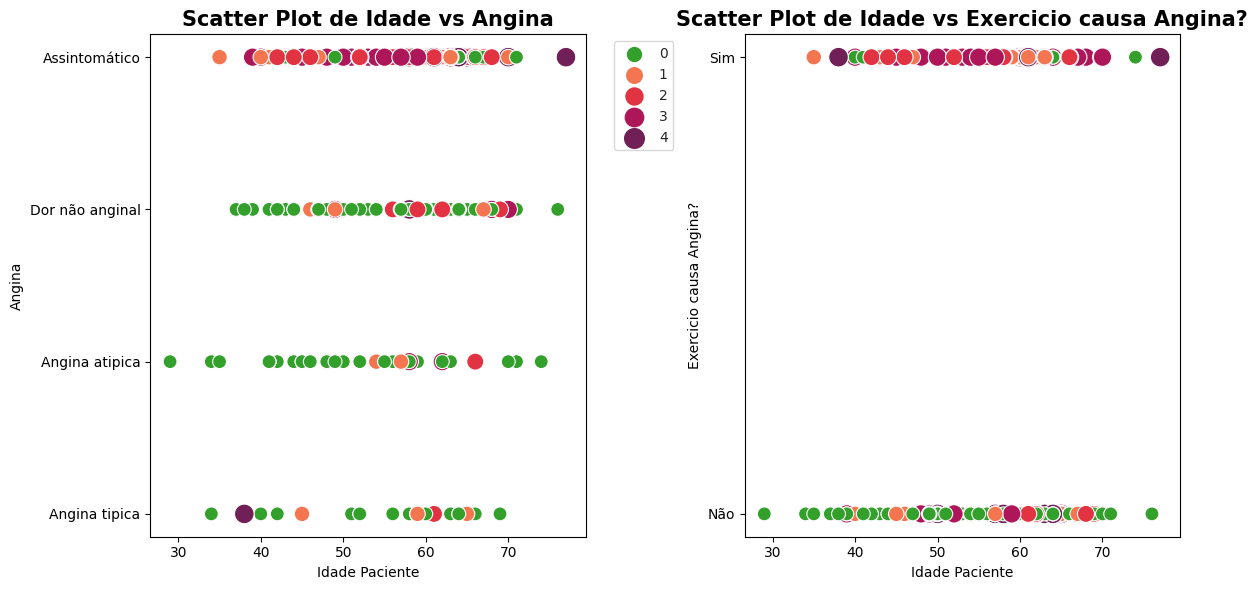

In [23]:
# Configurar a figura com duas colunas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Primeiro gráfico Scatter Plot de Idade vs Angina
sns.set_style("whitegrid")
sns.scatterplot(
    data=heart_disease, x="idade", y="angina", hue="grau doença arterial", size="grau doença arterial",
    sizes=(100, 200), legend="full", palette=paleta_grau_doenca_arterial, ax=axs[0]
)
axs[0].set_title("Scatter Plot de Idade vs Angina", fontsize=15, fontweight="bold") 
y_labels = ['Angina tipica', 'Angina atipica', 'Dor não anginal', 'Assintomático']
axs[0].set_yticks([1, 2, 3, 4])
axs[0].set_yticklabels(labels=y_labels)
axs[0].set_xlabel('Idade Paciente')
axs[0].set_ylabel('Angina')
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Segundo gráfico Scatter Plot de Idade vs Exercicio causa Angina?
sns.set_style("whitegrid")
sns.scatterplot(
    data=heart_disease, x="idade", y="exang", hue="grau doença arterial", size="grau doença arterial",
    sizes=(100, 200), legend="full", palette=paleta_grau_doenca_arterial, ax=axs[1]
)
axs[1].set_title("Scatter Plot de Idade vs Exercicio causa Angina?", fontsize=15, fontweight="bold") 
y_labels = ['Não', 'Sim']
axs[1].set_yticks([0, 1])
axs[1].set_yticklabels(labels=y_labels)
axs[1].set_xlabel('Idade Paciente')
axs[1].set_ylabel('Exercicio causa Angina?')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend().remove()

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos lado a lado
plt.show()


Como mencionado, podemos ver no grafico acima a esquerda a concentração de casos de maior grau de doença cardíaca no grupo assintomático e no grafico acima a direita uma maior ocorrência desses casos no grupo  Sim de angina durante a execução de exercícios. 

Voltemos agora a nossa atenção para os gráficos abaixo, de disperssão de nossas variáveis contínuas. 

O primeiro ponto que observo é com relação aos batimentos cardíacos. Mais uma vez podemos verificar a tendência de baixa freqência cardíaca com o aumento de casos mais graves de doença cardíaca confirmando o achado anterior na matriz de correlação. Vemos também que o aumento da depressão do segmento ST que é identificado no eletrocardiograma está diretamente ligado ao aumento de ocorrências de casos mais graves de doenças coronârias.

De forma bem discreta a pressão arterial acompanha o aumento da idade porem, embora esperado, não é bem claro que esse aumento esteja relacionado com o aumento de casos de doenças coronárias. O mesmo ocorre com o colesterol.

In [24]:
# Scatter Plot com Seaborn - Variação 2
#sns.pairplot(heart_disease_continuas, hue="grau doença arterial", palette=paleta_grau_doenca_arterial , height = 2.2)

## 4.0 Pré-Processamento de dados

Antes de iniciar o pré processamento dos dados irei criar um cópia do dataset Heart Disease para manter o original sem as alterações que serão feitas a seguir. O novo dataset conterá todas as colunas do original. Não vou retirar a variável que até então estou tratando como nossa variavel de classe porque na sequencia vou adicionar uma nova coluna chamada target consolidando os 4 diferentes valores referentes a presença de doenças cardíacas em um unico.

In [25]:
# salvando um NOVO dataset 
# o novo dataset irá conter todas as colunas
heart_disease_limpo = heart_disease
heart_disease_limpo.head()

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,angiografia,cintilografia,grau doença arterial
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 4.1. Considerações sobre o atributo Angiografia

A Angiografia coronária é um exame de imagem que utiliza um corante especial e raios X para visualizar as artérias coronárias, que fornecem sangue ao músculo cardíaco. Durante o exame, um cateter é inserido em uma artéria do braço ou da perna e é guiado até as artérias coronárias. O corante é injetado no cateter, permitindo que o médico visualize as artérias em um monitor de raios X. O fato da artéria não aparecer no exame é sinal de falta de fluxo sanguineo e consequentimente de uma obstrução.

O atributo angiografia do dataset está descrito como o numero de vasos sanguineos importantes **visíveis** durante o exame de mesmo nome. Os valores vão de 0 a 3 sendo zero atribuido a nenhum vaso e vai aumentando até tres vasos sanguineos. 

Observando a distribuição dos dados da angiografia nos gráficos abaixo podemos notar no primeiro a esquerda que a informação está aparentemente invertida pois ele mostra 176 casos onde nenhum vaso sanguineo pode ser visto durante o exame e apenas 20 ocorrências de corações sadios onde 3 vasos sanguineos puderam ser observados. A suspeita da inversão dos valores fica ainda mais evidênte quando no grafico da direita podemos observar que dentre as ocorrencias do atributo angiografia com valores 2 e 3 estão pacientes com maior grau de comprometimento cardíaco enquanto na distribuição do valor 0 podemos constatar muitos casos da cor verde que é ausência de problemas cardíacos.

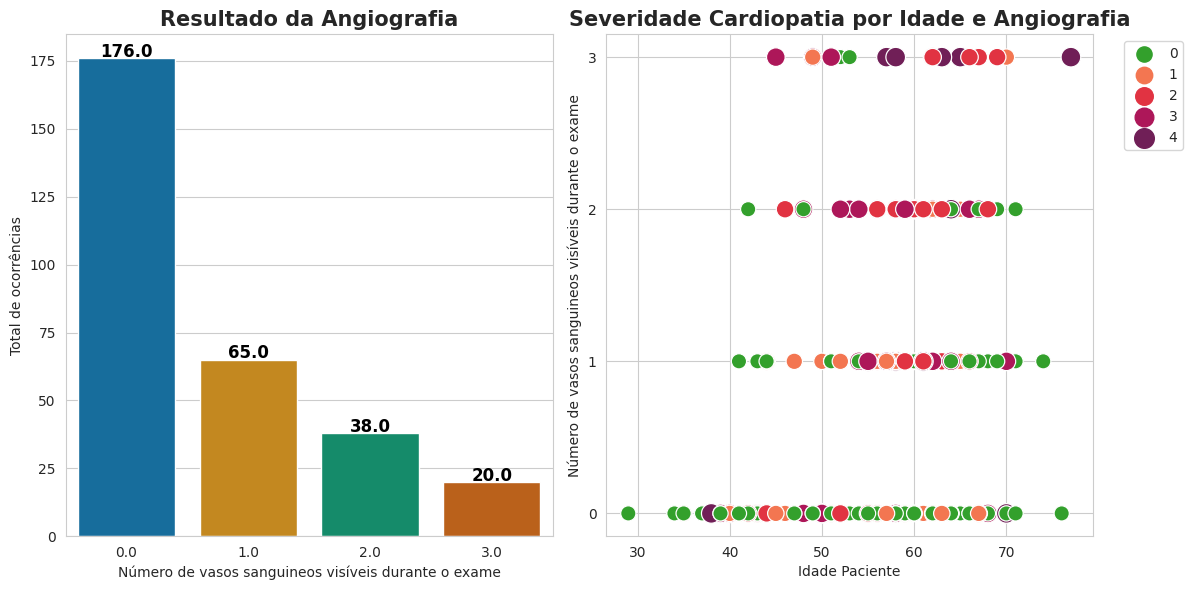

In [26]:
# Gráficos para a analise do atributo angiografia
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico countplot para análise do atributo angiografia
sns.set_style("whitegrid")
ax = sns.countplot(data=heart_disease_limpo, x="angiografia", ax=axs[0], palette="colorblind")
ax.set_title('Resultado da Angiografia', fontsize=15, fontweight="bold")
ax.set_xlabel('Número de vasos sanguineos visíveis durante o exame')
ax.set_ylabel('Total de ocorrências')

# Adicionar totais em cima das barras
for i in ax.patches:
    ax.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='baseline', fontsize=12, fontweight="bold",
                color='black', xytext=(0, 1),
                textcoords='offset points')

# Scatter plot para visualizar a severidade da doença nas categorias da angiografia
sns.scatterplot(
    data=heart_disease_limpo, x="idade", y="angiografia", hue="grau doença arterial", size="grau doença arterial",
    sizes=(120, 200), legend="full", palette=paleta_grau_doenca_arterial, ax=axs[1]
)
axs[1].set_title('Severidade Cardiopatia por Idade e Angiografia', fontsize=15, fontweight="bold")
axs[1].set_xlabel('Idade Paciente')
axs[1].set_ylabel('Número de vasos sanguineos visíveis durante o exame')
axs[1].set_yticks([0, 1, 2, 3])

# Posicionar a legenda fora do gráfico
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir os gráficos lado a lado
plt.tight_layout()
plt.show()

Diante dessa situação fui buscar mais informações sobre esse dataset e encontrei algumas interpretações diferêntes e controversas sobre esse atributo. Sendo assim, mesmo a angiografia sendo um importante indicador para o diagnóstico de problemas coronários, optei por excluir essa coluna do dataset e não utilizar essa informação neste estudo.

In [27]:
# Excluindo a coluna angiografia
heart_disease_limpo = heart_disease_limpo.drop("angiografia", axis=1)

# exibindo as primeiras linhas para verificar a exclusão da coluna
heart_disease_limpo.head()

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,cintilografia,grau doença arterial
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,3.0,0


### 4.2. Tratamento de Missings e Limpeza

Ao longo do estudo fomos comentando algumas situações e deixando para depois as soluções. No item 3.1 convertemos as variáveis do tipo object para variáveis do tipo int para que elas pudessem aparecer na estatística descritiva mas deixamos as variáveis float para serem convertidas posteriormente. Quando olhamos o density plot no item 3.3 falamos sobre a variável "grau doença arterial" que até agora é a nossa variavel target. Ao passar pelo boxplot comentamos os outliers e ainda temos que tratar os missings do dataset.

####4.2.1 Outliers##

Vamos iniciar substituindo os outliers do colesterol e da depressão do segmento ST pelos valores respectivos de suas medianas e depois regerando o boxplot para verificar o resultado. Veremos que nem todos os valores marcados como outliers serão removidos mas apenas os que forem acima do que foi definido como limite superior.

In [28]:
# Cálculo das medianas
mediana_dep_segmento_st = heart_disease_limpo['depressão do segmento ST'].median()
mediana_colesterol = heart_disease_limpo['colesterol'].median()

# Cálculo da média e do desvio padrão
media_dep_segmento_st = heart_disease_limpo['depressão do segmento ST'].mean()
desvio_padrao_dep_segmento_st = heart_disease_limpo['depressão do segmento ST'].std()

media_colesterol = heart_disease_limpo['colesterol'].mean()
desvio_padrao_colesterol = heart_disease_limpo['colesterol'].std()

# Cálculo dos limites superiores
limite_superior_dep_segmento_st = media_dep_segmento_st + 3 * desvio_padrao_dep_segmento_st
limite_superior_colesterol = media_colesterol + 3 * desvio_padrao_colesterol

print ("Limite superior Depressão Segmento ST :", limite_superior_dep_segmento_st)
print ("Limite superior Colesterol :", limite_superior_colesterol)

Limite superior Depressão Segmento ST : 4.5228290266019435
Limite superior Colesterol : 402.0238219348418


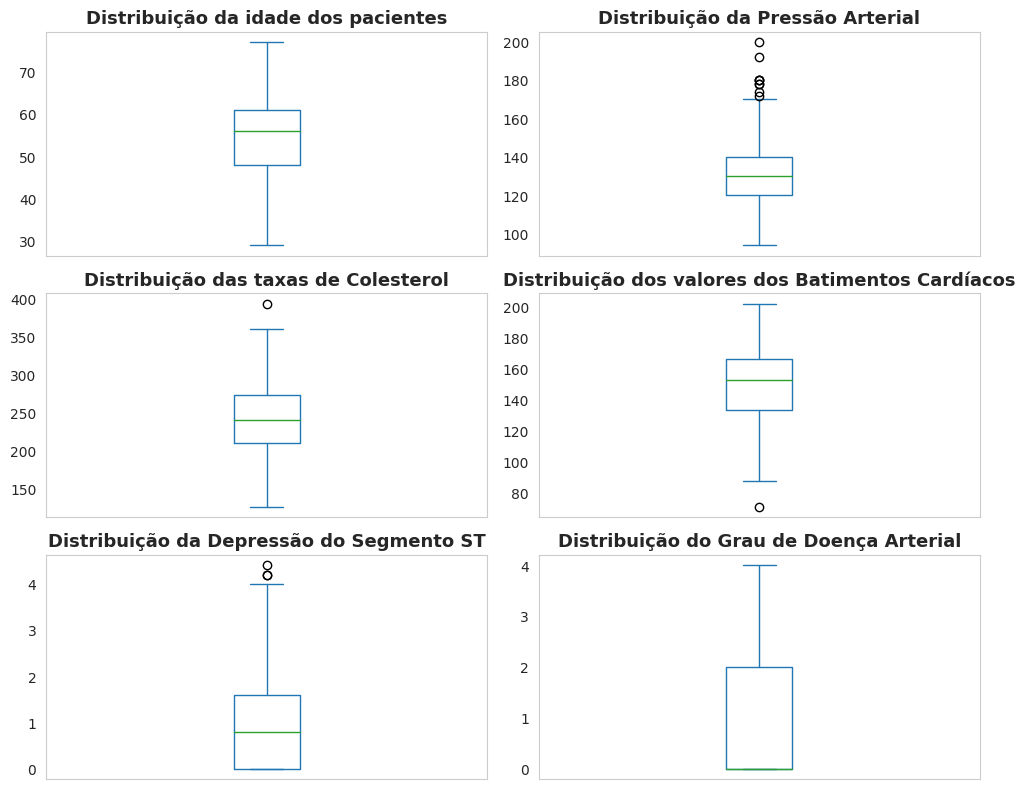

In [29]:
# Substituição dos outliers pela mediana
heart_disease_limpo['colesterol'].mask((heart_disease_limpo['colesterol'] > limite_superior_colesterol), mediana_colesterol, inplace=True)
heart_disease_limpo['depressão do segmento ST'].mask((heart_disease_limpo['depressão do segmento ST'] > limite_superior_dep_segmento_st), mediana_dep_segmento_st, inplace=True)

# Remontando heart_disease_continuas
heart_disease_continuas_limpo = heart_disease_limpo[["idade", "pa", "colesterol", "bpm", "depressão do segmento ST","grau doença arterial"]] 

# Gráfico box plot com o dataset reduzido heart_disease_continuas
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
for i, ax in enumerate(axs.flatten()):
    heart_disease_continuas_limpo.iloc[:,i].plot(kind = 'box', ax=ax)
    ax.set_title(titulos_heart_disease_continuas[i], fontsize=13, fontweight='bold')
    ax.grid(False)
    ax.tick_params(axis='x', labelbottom=False)
plt.tight_layout()

####4.2.2 Valores inválidos##

O próximo passo será a verificação da presença de valores inválidos no dataset e o tratamento dos mesmo. Vou executar apenas a busca pelos valores nulos. A busca por valores zero como valores inválidos não será necessária porque no resumo estatístco da sessão 3.1 podemos verificar que só existem zeros nas variáveis categóricas onde esse valor é um valor válido. Logo abaixo podemos constatar que só existem valores nulos na coluna cintilografia.

idade                        0
sexo                         0
angina                       0
pa                           0
colesterol                   0
glicose                      0
ecg                          0
bpm                          0
exang                        0
depressão do segmento ST     0
inclinação do segmento ST    0
cintilografia                2
grau doença arterial         0
dtype: int64


<Axes: >

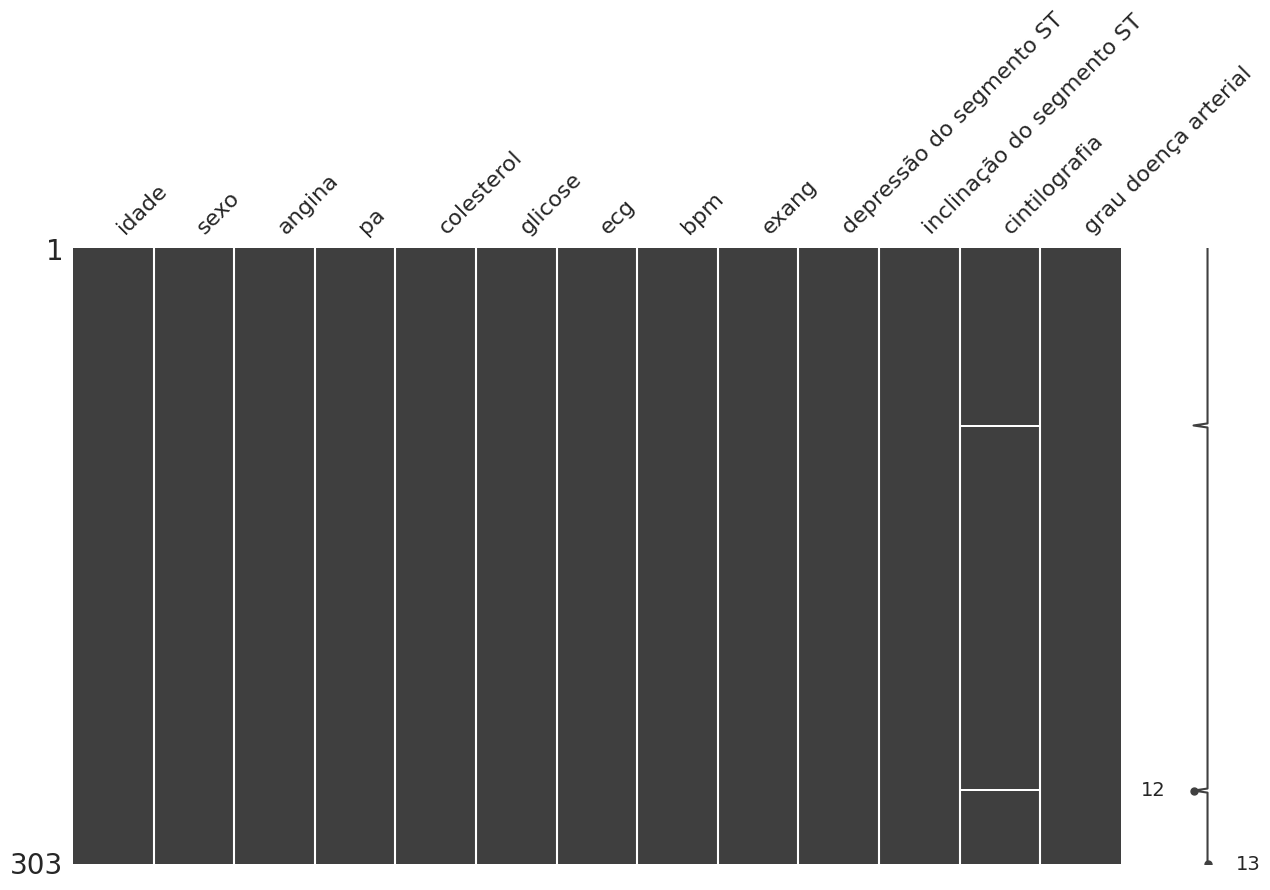

In [30]:
# Verificando os valores nulos
print(heart_disease_limpo.isnull().sum())

# exibindo visualização matricial da nulidade do dataset
ms.matrix(heart_disease_limpo, figsize=(15, 8))

Substituindo então os valores inválidos e verificando novamente a matriz de nulidade

<Axes: >

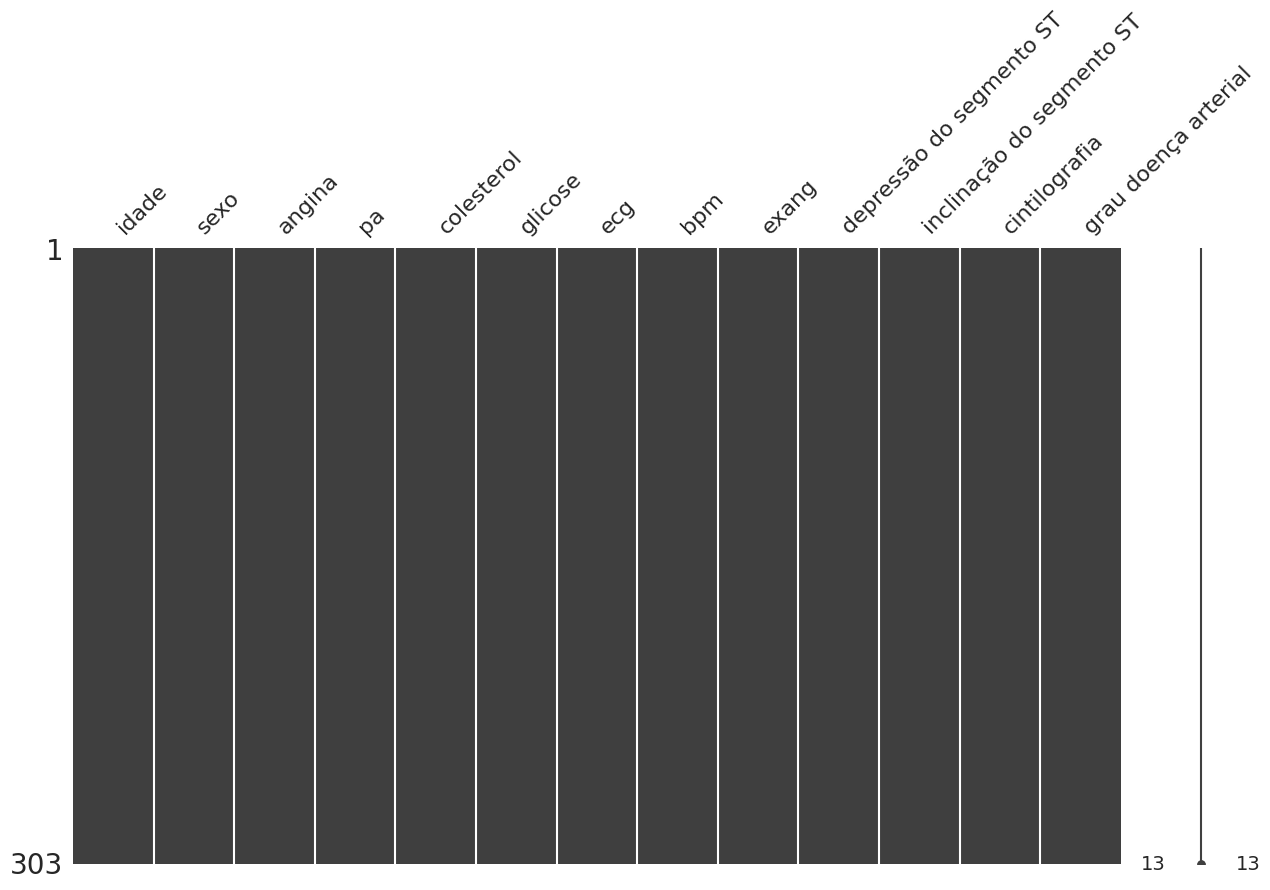

In [31]:
# Substituindo os inválidos de 'cintilografia' pela moda da coluna
moda_cintilografia = heart_disease_limpo['cintilografia'].mode()[0]
heart_disease_limpo['cintilografia'].fillna(moda_cintilografia, inplace=True)

# exibindo visualização matricial do dataset limpo
ms.matrix(heart_disease_limpo, figsize=(15, 8))

####4.2.3 Conversão dos tipos de dados##

Vimos anteriormente que todas as colunas do dataset são numéricas mas apenas a coluna depressão do segmento ST é realmente um número decimal (float), as demais são numero inteiros (int). O próximo passo será a conversão dos tipos de dados para os corretos.

In [32]:
# Verificando novamente os tipos de dados das colunas
heart_disease_limpo.dtypes



idade                        float64
sexo                         float64
angina                       float64
pa                           float64
colesterol                   float64
glicose                      float64
ecg                          float64
bpm                          float64
exang                        float64
depressão do segmento ST     float64
inclinação do segmento ST    float64
cintilografia                float64
grau doença arterial           int64
dtype: object

In [33]:
# Convertendo os atributos para int
heart_disease_limpo[["idade", "sexo", "angina", "pa", "colesterol", "glicose", "ecg", "bpm", "exang", "inclinação do segmento ST", "cintilografia"]] = \
heart_disease_limpo[["idade", "sexo", "angina", "pa", "colesterol", "glicose", "ecg", "bpm", "exang", "inclinação do segmento ST", "cintilografia"]].astype(int)

heart_disease_limpo.dtypes

idade                          int64
sexo                           int64
angina                         int64
pa                             int64
colesterol                     int64
glicose                        int64
ecg                            int64
bpm                            int64
exang                          int64
depressão do segmento ST     float64
inclinação do segmento ST      int64
cintilografia                  int64
grau doença arterial           int64
dtype: object

####4.2.4 Concatenação do Grau Doença Arterial##

Por fim vamos trabalhar com o atributo Grau Doença Arterial, deixando o valor 0 para ausência de doenças cardíacas e concatenando no valor 1 os valores que representam os diferentes graus de cardiopatias. Vamos salvar esse novo campo com o nome de target.

In [34]:
# Criando o atributo target e conferindo os valores 
heart_disease_limpo['target'] = heart_disease_limpo['grau doença arterial'].apply(lambda x: 0 if x == 0 else 1)
print(heart_disease_limpo.groupby('grau doença arterial').size())
print(heart_disease_limpo.groupby('target').size())

grau doença arterial
0    164
1     55
2     36
3     35
4     13
dtype: int64
target
0    164
1    139
dtype: int64


In [35]:
# Exibindo as primeiras linhas para verificar a inclusão da coluna target e seus valores
heart_disease_limpo.head(10)

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,cintilografia,grau doença arterial,target
0,63,1,1,145,233,1,2,150,0,2.3,3,6,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,7,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,3,0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,3,0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,3,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,3,0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,7,2,1
9,53,1,4,140,203,1,2,155,1,3.1,3,7,1,1


### 4.3. Separação dos dado em conjunto de treino e conjunto de teste.

Ao longo do estudo fomos comentando algumas situações e deixando para depois as soluções. No item 3.1 convertemos as variáveis

### 4.4. Normalização e Padronização.


A normalização e a padronização são técnicas de pré-processamento de dados que ajustam a escala dos atributos de um dataset. Essas técnicas são frequentemente aplicadas para garantir que os atributos estejam com valores em escalas comparável e para evitar que atributos com valores mais altos dominem os resultados em modelos de machine learning

Vamos a seguir separar os valores do dataset em componentes de input (X) e output (Y), depois aplicaremos as técnicas de normalização e de padronização nas nossa váriáveis contínuas de input ('pa', 'colesterol', 'bpm' e 'depressão do segmento ST') gerando um novo dataset para cada técnica aplicada.

Ao final teremos a nossa componente Y em heart_disease_y_trget, o dataset heart_disease_x_normalizado com a nossa componente X normalizada e o dataset heart_disease_x_padronizado com a nossa componente X padronizada

In [46]:
# Separando os valores de output (Y) do dataset no dataset heart_disease_trget
heart_disease_y_trget = heart_disease_limpo.values[:,13]
print(heart_disease_y_trget)

[0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.]


In [38]:
#Definição das colunas que serão normalizadas e padronizadas
colunas_continuas = ['pa', 'colesterol', 'bpm', 'depressão do segmento ST']

In [42]:
# Criando um dataset para normalização e excluindo a variavel de output
heart_disease_x_normalizado = heart_disease_limpo
heart_disease_x_normalizado = heart_disease_normalizado.drop("target", axis=1)

# Definindo o transformador para normalização
scaler = MinMaxScaler()
heart_disease_x_normalizado[colunas_continuas] = MinMaxScaler().fit_transform(heart_disease_x_normalizado[colunas_continuas])

# Verificando os valores normalizados
heart_disease_x_normalizado.head(10)

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,cintilografia,grau doença arterial
0,63,1,1,0.481132,0.399254,1,2,0.603053,0,0.522727,3,6,0
1,67,1,4,0.622642,0.597015,0,2,0.282443,1,0.340909,2,3,2
2,67,1,4,0.245283,0.384328,0,2,0.442748,1,0.590909,2,7,1
3,37,1,3,0.339623,0.462687,0,0,0.885496,0,0.795455,3,3,0
4,41,0,2,0.339623,0.291045,0,2,0.770992,0,0.318182,1,3,0
5,56,1,2,0.245283,0.410448,0,0,0.816794,0,0.181818,1,3,0
6,62,0,4,0.433962,0.529851,0,2,0.679389,0,0.818182,3,3,3
7,57,0,4,0.245283,0.850746,0,0,0.702290,1,0.136364,1,3,0
8,63,1,4,0.339623,0.477612,0,2,0.580153,0,0.318182,2,7,2
9,53,1,4,0.433962,0.287313,1,2,0.641221,1,0.704545,3,7,1


In [43]:
# Criando um dataset para padronização e excluindo a variavel de output
heart_disease_x_padronizado = heart_disease_limpo
heart_disease_x_padronizado = heart_disease_x_padronizado.drop("target", axis=1)

# Definindo o transformador para padronização
scaler = StandardScaler()
heart_disease_x_padronizado[colunas_continuas] = scaler.fit_transform(heart_disease_x_padronizado[colunas_continuas])

# Verificando os valores padronizados
heart_disease_x_padronizado.head(10)

,idade,sexo,angina,pa,colesterol,glicose,ecg,bpm,exang,depressão do segmento ST,inclinação do segmento ST,cintilografia,grau doença arterial
0,63,1,1,0.757525,-0.240825,1,2,0.017197,0,1.188077,3,6,0
1,67,1,4,1.611220,0.925461,0,2,-1.821905,1,0.453596,2,3,2
2,67,1,4,-0.665300,-0.328846,0,2,-0.902354,1,1.463507,2,7,1
3,37,1,3,-0.096170,0.133267,0,0,1.637359,0,2.289798,3,3,0
4,41,0,2,-0.096170,-0.878981,0,2,0.980537,0,0.361786,1,3,0
5,56,1,2,-0.665300,-0.174809,0,0,1.243266,0,-0.189074,1,3,0
6,62,0,4,0.472960,0.529364,0,2,0.455079,0,2.381608,3,3,3
7,57,0,4,-0.665300,2.421828,0,0,0.586443,1,-0.372694,1,3,0
8,63,1,4,-0.096170,0.221289,0,2,-0.114167,0,0.361786,2,7,2
9,53,1,4,0.472960,-0.900987,1,2,0.236138,1,1.922558,3,7,1


##5.0 Novas análises

In [ ]:
sns.lmplot(data=heart_disease, x="idade", y="pa", hue="grau doença arterial", palette=paleta_pizza)

In [ ]:
sns.lmplot(data=heart_disease, x="idade", y="colesterol", hue="grau doença arterial", palette=paleta_pizza)

In [ ]:
sns.lmplot(data=heart_disease, x="idade", y="bpm", hue="grau doença arterial", palette=paleta_pizza)

In [ ]:
sns.lmplot(data=heart_disease, x="inclinação do segmento ST", y="depressão do segmento ST", hue="grau doença arterial", palette=paleta_grau_doenca_arterial)

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Load the penguins dataset
#df = sns.load_dataset("heart")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=heart_disease, x="grau doença arterial", y="depressão do segmento ST", palette=paleta_pizza)
ax.set(ylabel="depressão do segmento ST")

In [ ]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=heart_disease, x="inclinação do segmento ST", y="depressão do segmento ST", hue="grau doença arterial", palette=paleta_grau_doenca_arterial)
ax.set(ylabel="Pressão Arterial")

In [ ]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=heart_disease, y="colesterol", hue="grau doença arterial", palette=paleta_grau_doenca_arterial)
ax.set(ylabel="Batimentos Cardíacos")

In [ ]:
df3 = heart_disease[heart_disease['grau doença arterial'] != 0 ][['idade', 'sexo', 'angina', 'pa', 'colesterol', 'glicose', 'ecg', 'bpm',
       'exang', 'depressão do segmento ST', 'inclinação do segmento ST', 'cintilografia', 'grau doença arterial']] 
#target 0 - people with heart disease
#pal = sns.cubehelix_palette(rot=-.2)
print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='idade',
              y='bpm',
              kind='hex',
              cmap='Reds'
           
              )

##6.0 